In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [48]:
df = pd.read_csv("dna_cleaned.csv")

df

,gene,expression,description,sequence,cleaned_sequence
0,100760238,0.148916,>NW_003613580.1:c1856023-1834794 Gata3 [organi...,TGCCGTTTCCTTGTGCTGGGGATCGTGTGCCCTCCTGCCAGAGTCA...,ATGCATTCCCTGTAA
1,100760532,0.387830,>NW_003613580.1:c2042129-1890886 Taf3 [organis...,AGCGGGAGGCGGAGCGAGTCCAAAATGGCGGCTCTCAGGCTGGCGC...,ATGGCGGCTCTCAGGCTGGCGCGCTCCGTGCTGCTGAGGCTTTGA
2,100761113,0.384858,>NW_003613580.1:2085202-2073913 Kin [organism=...,ATGGGCAAATCGGATTTTCTGAGCCCAAAGGCCATCGCGAATAGAA...,ATGGGCAAATCGGATTTTCTGAGCCCAAAGGCCATCGCGAATAGAA...
3,100760824,0.762337,>NW_003613580.1:c2073783-2053760 LOC100760824 ...,CTTAGCGAGACTGAAGACGCAAGCGAAGAGGGCGGGTGCGCCGGGA...,ATGATTAGTTCGGTAGGGATGTGGGGCTCGGGCTGCTGCGAAGCAG...
4,100754742,0.047732,>NW_003613580.1:c2325726-2314013 LOC100754742 ...,ATGGCTCCTCAGCTTGTTGCAAAAATTCAAGGACCTGAATTCAATC...,ATGGCTCCTCAGCTTGTTGCAAAAATTCAAGGACCTGAATTCAATC...
...,...,...,...,...,...
13247,103159063,0.713986,>NW_003702456.1:242-1 LOC103159063 [organism=C...,GCAATACCGCCAGCTTTCTGCGCTGCACAGGGCTCCACGCCCCACC...,ATGTCCGATACCACTGCCCCAGAAAAGTCCCGCATGTCCCCACCCC...
13248,103159064,0.200290,>NW_003708257.1:c142-5 LOC103159064 [organism=...,AGACAAATGCTCAGGAAATTGAGGACGTCTATGGTCTAAATGGTCA...,ATGCTCAGGAAATTGAGGACGTCTATGGTCTAA
13249,103159065,0.380840,>NW_003712409.1:186-16 LOC103159065 [organism=...,AAATTTGACACTCTTGTTGGTGAGAGAGGAGCACAGCTGAGTGGAG...,NaN
13250,100760682,0.417143,>NW_003717424.1:189-4 LOC100760682 [organism=C...,GACATCAGGACCATCAATGTGAGGTATCTGCGGGAAATCATTGGGG...,NaN


In [45]:
df = pd.read_csv("chodata.csv")

df

,log_prec_y,Gene ID,description,sequence
0,0.485237,100682525,>NW_003613643.1:1643801-1638391 Tp53 [organism...,AAGCCTGGCTGACTTCTTGGGTGCTGCCATGGAGGAGCCACAGTCA...
1,0.258538,100682526,>NW_003619211.1:c16599-9011 Tuba1c [organism=C...,AGTCTATATAAGACCTCTCCTGGAGGCGGACTCACACTGCTTCTCC...
2,0.632336,100682527,NaN,NaN
3,0.993341,100682528,>NW_003614949.1:69399-49056 Tuba1b [organism=C...,CTGTATATAAGGAGCCGCATCCGCCCATGTGCCGCAGGTTCTCTTA...
4,0.541653,100682529,>NW_003614027.1:1194116-1180637 Mgat1 [organis...,TTGCAGGGGATATCTGTGGAAGGTGCCAGCATCTAGGTCTGGGTAG...
...,...,...,...,...
11061,0.488891,113839031,NaN,NaN
11062,0.354690,113839032,NaN,NaN
11063,0.290464,113839093,NaN,NaN
11064,0.432107,113839106,NaN,NaN


In [29]:
len(df)

11066

In [31]:
df.columns

Index(['log_prec_y', 'Gene ID'], dtype='object')

In [49]:
df = df.sort_values("expression")
df.head()

,gene,expression,description,sequence,cleaned_sequence
10385,100772380,0.000000,>NW_003614997.1:51658-43872 Gnat2 [organism=Cr...,TTCTCTGAGGAGACAACAGAGATGGGGAGTGGAATCAGTGCTGAGG...,ATGGGGAGTGGAATCAGTGCTGAGGACAAAGAACTTGCCAAGAGGT...
1591,103159486,0.000083,>NW_003613646.1:2369668-2349299 LOC103159486 [...,ATGAGGGAATGGCCTGGCTACCCAGTAGCCAAGAGGCTCCAGCTGA...,ATGAGGGAATGGCCTGGCTACCCAGTAGCCAAGAGGCTCCAGCTGA...
5087,103160349,0.000126,>NW_003613904.1:1115850-1115173 LOC103160349 [...,ATGAACGGGCAGTTCTCATCCCCAGTCAGCCCAGGTTCCGATTCTG...,ATGAACGGGCAGTTCTCATCCCCAGTCAGCCCAGGTTCCGATTCTG...
8747,100773247,0.000198,>NW_003614529.1:93937-87007 LOC100773247 [orga...,GGCCGGGACTGAGTGAGTGAATGAGGTGGAGCACGGGCGGCTTGGT...,ATGCCAGCGCCCGCCCGGGGCTGA
4181,103163815,0.000265,>NW_003613836.1:813123-795024 LOC103163815 [or...,TGGTGTGGGCTGTAATTAGGTCAGTGTAAGTTAAAGTAGGGCTGAG...,ATGAATAAAGTAGATTTTCTCCTCTGGAACACTCTGCAGTTTAATT...


<Axes: ylabel='expression'>

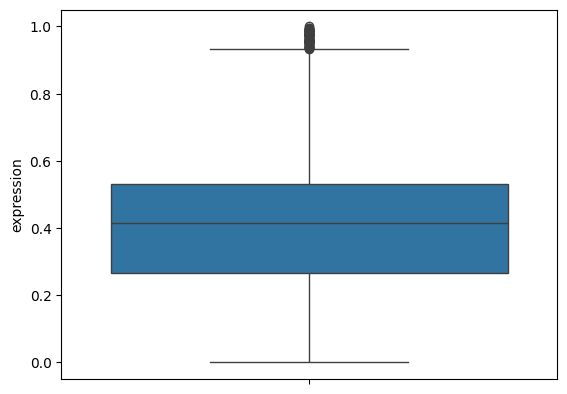

In [50]:
sns.boxplot(df["expression"])

In [51]:
df = df.reset_index()

In [52]:
li = [i * len(df)//10 for i in range(10)] + [len(df)]
li

[0, 1325, 2650, 3975, 5300, 6626, 7951, 9276, 10601, 11926, 13252]

In [53]:
deciles = [df.loc[li[i]:li[i+1]] for i in range(10)]

In [54]:
[len(decile) for decile in deciles]

[1326, 1326, 1326, 1326, 1327, 1326, 1326, 1326, 1326, 1326]

In [55]:
train_l = []
test_l = []

for decile in deciles:
    d_train, d_test = train_test_split(decile, test_size=0.2)
    
    train_l.append(d_train)
    test_l.append(d_test)

In [56]:
train = pd.concat(train_l)
test = pd.concat(test_l)

In [57]:
train_index = list(train.index)
test_index = list(test.index)

In [58]:
import pickle

with open("splits_rna.pkl", "wb") as f:
    pickle.dump([train_index, test_index], f)

In [13]:
def rebalance(df):
    tenths = []

    for i in range(10):
        tenth = df[(df["expression"]>=(i/10)) & (df["expression"]<((i+1)/10))]
        tenths.append(tenth)
    
    scaled_tenths = []
    
    max_len = max([len(tenth) for tenth in tenths])

    for tenth in tenths:
        scaled_tenths.append(pd.concat([tenth]*(max_len//len(tenth))))
        
    df_smoke = pd.concat(scaled_tenths)
    
    return df_smoke

In [14]:
train_rb = rebalance(train)
test_rb = rebalance(test)
val_rb = rebalance(val)

In [15]:
len(test_rb)

2596

In [16]:
len(val_rb)

2598

In [17]:
len(train_rb)

20894

In [18]:
test_rb

,index,gene,expression,description,sequence,cleaned_sequence
211,5192,100753928,0.015433,>NW_003613912.1:1563404-1539447 CUNH11orf65 [o...,ATGCTTGGGGAATCGATCCAAGAATTTTCAGAGGAGGAGAGAGCTG...,ATGCTTGGGGAATCGATCCAAGAATTTTCAGAGGAGGAGAGAGCTG...
735,11556,100765767,0.055295,>NW_003615688.1:45185-44652 LOC100765767 [orga...,CACGCGGAGTCAACATGAGGACCGAGAAATGTTATTTCTGTTCCGG...,ATGAACCTGTGA
1169,1617,100769255,0.091149,>NW_003613647.1:c1358668-1291214 LOC100769255 ...,GGGTGGTGATGCTTTTGTGGTGCAGATGCTCCATTTTTATTGTTCC...,ATGGACAGAGGAGGTTACCAACTTCATGACCTGTTTCATAGACACA...
314,1954,100774450,0.022151,>NW_003613667.1:2334768-2317493 Tigit [organis...,ATCCTGTGTGTCACCAGATGCCCTTGAGTGCTTTTCACAAAAGCTG...,ATGGCTGGCTGTTCCTGA
701,4667,100752818,0.053189,>NW_003613867.1:1361585-1361323 LOC100752818 [...,CAGGAAGGAAGGAAGGACCCGGAGCAGAAGCACTGTATCCAGCACT...,ATGGCAGAAGTGAATTCCATGTTCCAGGAGGTCCTTCCAAAAAAAG...
...,...,...,...,...,...,...
13198,12748,100758533,0.940021,>NW_003617759.1:33796-30629 Rpl9 [organism=Cri...,TAGCCTTATCGTCGCGCGCTCATGACGCAACACGCAGGGCCCCTGA...,ATGACGCAACACGCAGGGCCCCTGACGGAATACAAGAACGTGATGA...
13250,8961,100773922,0.995767,>NW_003614570.1:646127-643945 Rps11 [organism=...,AGTCCCGAGATCGCGTGCTCTGAGCCGGAAGTACCTCCTAAACCGT...,ATGACTCGGTGGCTCAGACAGGGCTAG
13187,10753,100765281,0.927609,>NW_003615164.1:113043-88694 Calm2 [organism=C...,ATGGTTCAGGAGCTGGATGGGGAGGGGGATGCCCATGGTCTCCCCA...,ATGGTTCAGGAGCTGGATGGGGAGGGGGATGCCCATGGTCTCCCCA...
13224,12919,100768693,0.972346,>NW_003619313.1:c8662-2101 LOC100768693 [organ...,TGGGGCGGGGGCGGGGTCTACCGGGGCCGCAGCCTGGGAGGCTTTA...,ATGGACAGCCTGGGGACCACAGCATCTGCAACCCCTTCTGGGGACC...


In [19]:
train_rb.to_csv("train_rb.csv")
test_rb.to_csv("test_rb.csv")
val_rb.to_csv("val_rb.csv")

In [1]:
train_rb

NameError: name 'train_rb' is not defined

In [54]:
test

,level_0,index,gene,expression,description,sequence,cleaned_sequence
1705,431,12359,103164511,0.031363,>NW_003616736.1:c53680-51946 LOC103164511 [org...,ATGAAGAATGGAACAGTCATTCTTTCTGTGCTCAAGTTTTCAGTAG...,ATGAAGAATGGAACAGTCATTCTTTCTGTGCTCAAGTTTTCAGTAG...
1511,237,10164,100760625,0.017872,>NW_003614910.1:254338-253691 LOC100760625 [or...,TAAACATGGGCAAAGGAGATCCTAAGAAGCCGAGAGGCAAAATGTC...,ATGCATTTTTGTGCAAACTTGCCGAGAGGAACACAAGAAGAAGCAC...
0,0,10385,100772380,0.000000,>NW_003614997.1:51658-43872 Gnat2 [organism=Cr...,TTCTCTGAGGAGACAACAGAGATGGGGAGTGGAATCAGTGCTGAGG...,ATGGGGAGTGGAATCAGTGCTGAGGACAAAGAACTTGCCAAGAGGT...
1599,325,5758,103159177,0.023478,>NW_003613983.1:1129875-1122876 LOC103159177 [...,TTGCTTCTTGCTGTAGAGGCTGCTGCCACCGGCTGGCTAGGTCGCT...,ATGCTGCAAACCACTTTCCATTTCTGA
1668,394,9653,100774031,0.028359,>NW_003614763.1:65139-45859 Lrrc56 [organism=C...,GTCCCGGCAACCGTTGCTAGGGGGCGGGGCTCATCCTGCCGCAGCC...,ATGGCGCCAGGGCCGCAACCCCACCGCGGAGGAAAAAATAAAAAAA...
...,...,...,...,...,...,...,...
23882,13197,648,100756201,0.937384,>NW_003613605.1:c4499601-4494860 Rplp0 [organi...,ACCCAATGGCTGCCTACATTGATTTGGTGAGGCGGGACGGTTGATG...,ATGTCGTCATCGGATAACCAGGCCGCCCATATAAAAGGCGCACGCG...
23642,13236,3141,100756818,0.982049,>NW_003613745.1:c1605195-1601663 Rpl23 [organi...,CGCCACTGGGTGGGGGGAGAGGTGTGGAGAGGTCCGGTCACGTGGC...,ATGGAGATTCCAGTCCCCGTATCCTGGACGGAAGGACGGTAA
25040,13239,2063,100689409,0.985325,>NW_003613677.1:c181541-176718 B2m [organism=C...,GCTCTGAGCAGCGCCCACGATGGCTCGCTCCGTGGCCGTGGTCTTT...,ATGCGGCCGGTTTCCGACTGTGAGTTGAGACAGGGAACACTTCTCT...
24456,13213,4477,100754509,0.957920,>NW_003613855.1:c1367744-1363397 Hsp90ab1 [org...,TTAGTAATTAATGTGTAATGCTTTCTTAGATGCCTGAGGAGGTGCA...,ATGGCGAGGAAGAGGTGGAGACCTTTGCCTTCCAGGCAGAAATCGC...


In [55]:
val

,level_0,index,gene,expression,description,sequence,cleaned_sequence
1808,534,10157,103160567,0.038734,>NW_003614906.1:70923-63826 LOC103160567 [orga...,ATCAGCATTTTCCTCCCCTAACTGTGACCATTGTTCCCAGTCTTGT...,ATGAGCTTCCATGTGGATAGATTCAGTAGTGCTTCGAAGAAAATCC...
58,58,1405,100760954,0.004454,>NW_003613640.1:1885877-1881802 LOC100760954 [...,GAGACCCACCTGTCTCTGCTTCCTCAGTTCTGGAATTAAAGGTGTG...,ATGCCACCATGCCTGGAGAGCTTCCATTTTAAGGTAAGGAGACTGA...
1210,1210,716,100750531,0.095070,>NW_003613610.1:c3195914-3080388 Vwf [organism...,GGCACTGAGCTCCAGCTCCAAGAGGAGTGTACTTTGTGCAGAAGTC...,ATGTTTGTCCTTGACGGGCTGAACCCTTGA
2543,1269,2845,100773497,0.099638,>NW_003613716.1:c1238169-1226527 Jak3 [organis...,TTAATTTTCTTTATTAGAGACAGGGTCTCTCTGTGAAGCACTGGCT...,ATGCCTGCTTTTGTTGTTTTATTATGGGAGGATACACATGCAGCTC...
1922,648,6597,100752745,0.048537,>NW_003614105.1:c386726-368792 Cnr2 [organism=...,GTGACTTCCTGCTGCCTCTGAATCAACATGTAGGACTCTCGGCTCC...,ATGTAG
...,...,...,...,...,...,...,...
24555,13219,2994,100774375,0.961309,>NW_003613730.1:c2303854-2297591 Ppib [organis...,GTGTTCACACCCTCTTCCGGTCCGGGCTCCCGCGACCGCTTCTCCT...,ATGACCTCTTGGAACCAGGCTCGCCCTACCCAGCCCCCGCTCCCCC...
24001,13223,7364,100689052,0.970561,>NW_003614217.1:c553206-550097 Myl6 [organism=...,GGGCCCCGACTAGCATCCCTATTGGACGGAGCGGCAGACGGTGACG...,ATGACCCTAGAGTCCCCAGCCGCCGCTCCTACTTCCTTATATGGAC...
24923,13215,565,100763833,0.958302,>NW_003613601.1:3689444-3687605 LOC100763833 [...,GAGCTGCCAGAAGAGCAGAGAGACTGAGGCCAACCCAGACCTGCCT...,ATGTGCTGGCCCAGCCAGGTGAGACCCCAGCTTCCTTCTCCTCACA...
23695,13196,11504,100689327,0.937136,>NW_003615623.1:c82307-74491 Serpinh1 [organis...,GCTCTCCGGAAGCGTTTCCAACTTTCCAGAAGTTTCTTAGGACAAG...,ATGAAAAAGGCAGGCAGTGATCTCCCTCTGAGGCAGTTTCAAGGTA...


(array([30., 27., 27., 28., 30., 30., 11., 21., 29., 21., 35., 25., 27.,
        31., 16., 21., 23., 22., 17., 24., 27., 16., 19., 29., 30., 22.,
        25., 34., 30., 52., 15., 13., 22., 34., 26., 23., 22., 17., 27.,
        33., 23., 28., 36., 23., 23., 28., 35., 31., 23., 29., 36., 26.,
        27., 25., 22., 21., 25., 14., 12., 25., 28., 21., 32., 24., 27.,
        20., 25., 14., 26., 18., 20., 38., 38., 32., 37., 29., 21., 19.,
        28., 11., 41., 27., 28., 35., 36., 29., 23., 21., 28., 15., 40.,
        24., 34., 31., 19., 38., 32., 25., 20., 33.]),
 array([4.33945585e-04, 1.03872729e-02, 2.03406002e-02, 3.02939276e-02,
        4.02472549e-02, 5.02005822e-02, 6.01539096e-02, 7.01072369e-02,
        8.00605642e-02, 9.00138915e-02, 9.99672189e-02, 1.09920546e-01,
        1.19873874e-01, 1.29827201e-01, 1.39780528e-01, 1.49733856e-01,
        1.59687183e-01, 1.69640510e-01, 1.79593837e-01, 1.89547165e-01,
        1.99500492e-01, 2.09453819e-01, 2.19407147e-01, 2.29360474e-01,
  

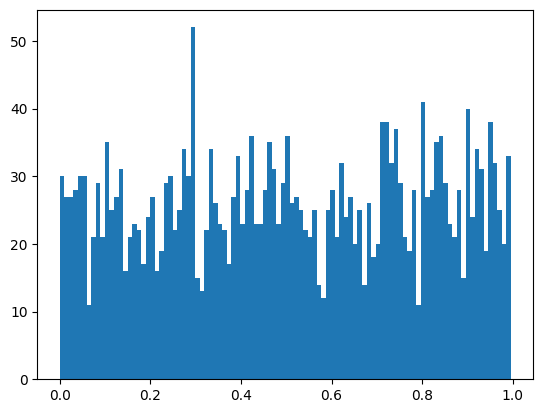

In [56]:
import matplotlib.pyplot as plt

plt.hist(val["expression"], bins=100)

In [57]:
train.to_csv("train_smoke.csv")
test.to_csv("test_smoke.csv")
val.to_csv("val_smoke.csv")

In [2]:
import pandas as pd
train = pd.read_csv("train.csv")

In [3]:
train.head()

,Unnamed: 0,index,gene,expression,description,sequence,cleaned_sequence
0,953,133,103161373,0.074376,>NW_003613583.1:2487957-2466471 LOC103161373 [...,TGCAGCCACTGCCCCGGCCGAGCGCGGGCGGAAAACGAAACCGCAG...,ATGGCAAAGTCCCGGGCAGGAAGTTTACAAGGCTCAACGTAA
1,631,8474,100767300,0.047194,>NW_003614457.1:481247-478976 LOC100767300 [or...,ATGGGGCAGACTCAGGTGGTTCAGGAACTGGGAGTAGTGAAAAGTG...,ATGGGGCAGACTCAGGTGGTTCAGGAACTGGGAGTAGTGAAAAGTG...
2,1056,7557,100765254,0.081416,>NW_003614244.1:c830756-830308 LOC100765254 [o...,ATGCTGTGTGGAAGCCGAAGCCACTCTTCCTGGGTGGCCCCTCCGG...,ATGCTGTGTGGAAGCCGAAGCCACTCTTCCTGGGTGGCCCCTCCGG...
3,823,6498,100769774,0.063045,>NW_003614085.1:c1061110-1053520 Nacad [organi...,CATCCACGCCCCCCCCCATCAGAGGGGCGGTGGCCGAGCTGGCTAC...,ATGAAAGCCTGGAGGCAGCAGACAGCATCCTCCAAAGCCTGCAGCT...
4,148,4626,103161433,0.010699,>NW_003613865.1:c345643-334084 LOC103161433 [o...,CGAGGGGCGGGATCCCAAAGTTCAATAAGGAATCCTGGGGCCAGAC...,ATGCGCGGCTCTCCTACTTGCTGA


In [4]:
sequences = train["sequence"]

In [5]:
sequences

0        TGCAGCCACTGCCCCGGCCGAGCGCGGGCGGAAAACGAAACCGCAG...
1        ATGGGGCAGACTCAGGTGGTTCAGGAACTGGGAGTAGTGAAAAGTG...
2        ATGCTGTGTGGAAGCCGAAGCCACTCTTCCTGGGTGGCCCCTCCGG...
3        CATCCACGCCCCCCCCCATCAGAGGGGCGGTGGCCGAGCTGGCTAC...
4        CGAGGGGCGGGATCCCAAAGTTCAATAAGGAATCCTGGGGCCAGAC...
                               ...                        
10596    GGGCGTGGGGGTTGGCCGGGTTTGGTGTGCGCCTGCGCCGATCGCC...
10597    CGCCGGAAGTCCTCAGCGCGGCGCGTGCGTGGATAGAGCAGAAGGG...
10598    CCGAGGCCCCGCTCCCAGGGAACACTAGTAGTTCCGGGTTGCCCGC...
10599    GGCAGTGCCATGTGGAGAGGAAGCAGCTCCTTCACCAGCTTGGTGG...
10600    ATTTTCAGCAGACAAAGCATCTTTTGTCTTATGAAATTACAACTCC...
Name: sequence, Length: 10601, dtype: object

In [7]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("../dnabert2", trust_remote_code=True)

TGCAGCCACTGCCCCGGCCGAGCGCGGGCGGAAAACGAAACCGCAGGCCGCTTCGCGGGCGCTTTGTCTCCGGCGCTGCAAGCGGGACCCGGCGAGTGGCTTCAGTTCTGGCAGCGCCACGAACCGCACAAGTTCCCTAGTAGGACGGCTGGTTCACTCATTCAGAAAGGCGCACCCACACGCGTGCATTAACACACGCTCGGAGCGCACACGCACTGATGCCCAAGCGAATCCCCGAATCACCAACTCAGACGTACGAACTTGCACCCAGTGCGCGCCCCACTCACGTACCCCAGGTTCCCACGGGAGCTGCCATTGCGATCGCCCTCATTCACACACACGCCACTCTCAGATCTGAACTAAAACAGCAAAGTCTCCTTAGAGCCCCCTCCCCCCACTCTCAACTCTGAAATCCTTTTTTTTGGCCCCGCGGCCCCGAGTCCCCTTTTACAAGCGCAGGTTCTGATTTCCTGAGAGATGGCAAAGTCCCGGGCAGGAAGTTTACAAGGCTCAACGTAAACACGTTCCGGGGGATCCTTTAATAATAAGAGTAGGGAAGCCTGCCGGCGCGGGGGGAGTTGGCCTGATGCCCCTATGGGCTCGGCCTGCCGCCGCCGCGGGGCCTCCCGACACTGCGCGCCAGGCCGGGTTCCGGAAAGCGGGCGGCGCTGGCGGGGAGAGCGGCAGGGAGCGGCCCTGACTGCGGGGTCGCGGCCGTGGAAAGCTGGTGCGTGATGCAGCACCGTGCGCGAGATCCAGCTAGACTCTGCGCGCCCGAAACCAGGTGAGTGCGGGCCTCCTGCCGCACAGACGCACAGACGTGCACGCAGGCCCTGCTGGCGGGGAGGGTGATGAAGGATGTTTTCGCTTGTCAGTGAGAGGCACACAGGAGTCAGGCTGCTGCGCCCTGGCGCGAGCTGCAGGGAGAGGTGTGTGTGGGTCTACTTCAAAGCCTGCCGGCCTCAAGTTTCTTTGGATTCCTGGTTCCCCATCTTCTCCC

In [11]:
li = []

for seq in sequences:
    try:
        tokens = tokenizer(seq)
        li.append(tokens)
    except: 
        continue
    

In [12]:
# warmup, cosine, depth

In [16]:
lens = [len(item["input_ids"]) for item in li]

In [17]:
max(lens)

212862